In [1]:
import pickle
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load in the labels
import pandas as pd
labels = pd.read_csv('/content/drive/MyDrive/EVO/rif_embeddings_v1/12259_rif_labels.csv')

In [4]:
labels

,Unnamed: 0,UNIQUEID,RIF_BINARY_PHENOTYPE
0,0,site.02.subj.0001.lab.2014222001.iso.1,S
1,1,site.02.subj.0002.lab.2014222005.iso.1,S
2,2,site.02.subj.0004.lab.2014222010.iso.1,S
3,3,site.02.subj.0005.lab.2014222011.iso.1,S
4,4,site.02.subj.0006.lab.2014222013.iso.1,S
...,...,...,...
12254,12282,site.20.subj.SCH8604398.lab.YA00134621.iso.1,S
12255,12283,site.20.subj.SCH8604399.lab.YA00134971.iso.1,S
12256,12284,site.20.subj.SCH8608291.lab.YA00135762.iso.1,R
12257,12285,site.20.subj.SCH8608295.lab.YA00134623.iso.1,S


In [5]:
labels['RIF_BINARY_PHENOTYPE']

0        S
1        S
2        S
3        S
4        S
        ..
12254    S
12255    S
12256    R
12257    S
12258    S
Name: RIF_BINARY_PHENOTYPE, Length: 12259, dtype: object

In [6]:
labels['phenotype'] = labels['RIF_BINARY_PHENOTYPE'].replace({'S': 1, 'R': 0})

In [7]:
y = np.array(labels['phenotype'])

In [8]:
y.shape

(12259,)

In [9]:
def load_and_concatenate_npy_files(npy_files):
    """Load and concatenate all .npy files."""
    arrays = np.load(npy_files, allow_pickle=True)
    if arrays.size == 0 or arrays.size == 1:
      return None
    concatenated_array = np.squeeze(arrays)
    return concatenated_array[-1,:]

In [9]:
'''
import os
import fnmatch
import numpy as np

def find_npy_files(base_dir, pattern):
    """Recursively find all .npy files matching the pattern in base_dir."""
    npy_files = []
    for root, _, files in os.walk(base_dir):
        for file in files:
            if fnmatch.fnmatch(file, pattern):
                npy_files.append(os.path.join(root, file))
    return npy_files[0]

# Example usage
files_list = labels['UNIQUEID'].tolist()

'''

In [10]:
import csv

file_path = '/content/drive/MyDrive/npy_files_final.csv'

csv_data = []

# Open and read the CSV file
with open(file_path, newline='') as csvfile:
    csvreader = csv.reader(csvfile)
    for row in csvreader:
        csv_data.extend(row)

In [11]:
len(csv_data)

12259

In [12]:
import tensorflow as tf
'''
concatenated_array = []
# Load and concatenate arrays
for npy_file in csv_data:
    concatenated_array.append(load_and_concatenate_npy_files(npy_file))
concatenated_array = np.concatenate(concatenated_array)
'''

'\nconcatenated_array = []\n# Load and concatenate arrays\nfor npy_file in csv_data:\n    concatenated_array.append(load_and_concatenate_npy_files(npy_file))\nconcatenated_array = np.concatenate(concatenated_array)\n'

In [ ]:
# Function to load arrays and extract the last index
def load_and_concatenate_batches(npy_files, batch_size):
    concatenated_batches = []
    for start_index in range(0, len(npy_files), batch_size):
        batch_files = npy_files[start_index:start_index+batch_size]
        batch_list = []
        for npy_file in batch_files:
          array = load_and_concatenate_npy_files(npy_file)
          if array is not None:
            batch_list.append(np.squeeze(array))
          else:
            print(npy_file)
        batch = np.stack(batch_list, axis=0)
        batch = np.squeeze(batch)
        np.save(str('/content/drive/MyDrive/rif_embeddings_0526' + str(start_index) + "_arrayfinal3.npy"), batch)
        concatenated_batches.append(batch)
        print(start_index)
    concat_batch = np.vstack(concatenated_batches)
    #concat_array = concat_batch.numpy()

    return concat_batch

# Load and concatenate arrays in batches
batch_size = 100  # Adjust batch size based on available GPU memory
concatenated_array = load_and_concatenate_batches(csv_data, batch_size)


In [13]:
#Save the concatenated array to easily load
concatenated_array = np.load('/content/drive/MyDrive/rif_concatenatedarray_lastposition.npy')

In [14]:
concatenated_array.shape

(12259, 4096)

In [15]:
nan_indices = np.isnan(y)
y = y[~nan_indices]
concatenated_array = concatenated_array[~nan_indices]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(concatenated_array, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import torch

In [17]:
# Train a logistic regression model
clf = LogisticRegression(multi_class='ovr')

# Train the classifier
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

for i in range(10):
    print(f'Predicted: {y_pred[i]}, Actual: {y_test[i]}')

Accuracy: 0.737888198757764
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 1.0
Predicted: 1.0, Actual: 1.0
Predicted: 0.0, Actual: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
'''
import numpy as np
import os

def load_and_concatenate_npy_files(directory, axis=0):
    # List all .npy files in the specified directory
    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]

    # Load each file and store the arrays in a list
    arrays = [np.load(os.path.join(directory, file)) for file in npy_files]
    print(npy_files)

    # Concatenate the list of arrays along the specified axis
    concatenated_array = np.concatenate(arrays, axis=axis)

    return concatenated_array

# Example usage:
directory_path = '/content/drive/MyDrive/BioE212/test/embeds_1.1_small'
concatenated_array = load_and_concatenate_npy_files(directory_path)

#print(concatenated_array)
'''

"\nimport numpy as np\nimport os\n\ndef load_and_concatenate_npy_files(directory, axis=0):\n    # List all .npy files in the specified directory\n    npy_files = [f for f in os.listdir(directory) if f.endswith('.npy')]\n\n    # Load each file and store the arrays in a list\n    arrays = [np.load(os.path.join(directory, file)) for file in npy_files]\n    print(npy_files)\n\n    # Concatenate the list of arrays along the specified axis\n    concatenated_array = np.concatenate(arrays, axis=axis)\n\n    return concatenated_array\n\n# Example usage:\ndirectory_path = '/content/drive/MyDrive/BioE212/test/embeds_1.1_small'\nconcatenated_array = load_and_concatenate_npy_files(directory_path)\n\n#print(concatenated_array)\n"

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f'Confusion Matrix:\n{cm}')
print(f'Sensitivity (Recall): {sensitivity}')
print(f'Specificity: {specificity}')

Confusion Matrix:
[[ 619  307]
 [ 326 1163]]
Sensitivity (Recall): 0.781061114842176
Specificity: 0.6684665226781857


In [ ]:
#PCA

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

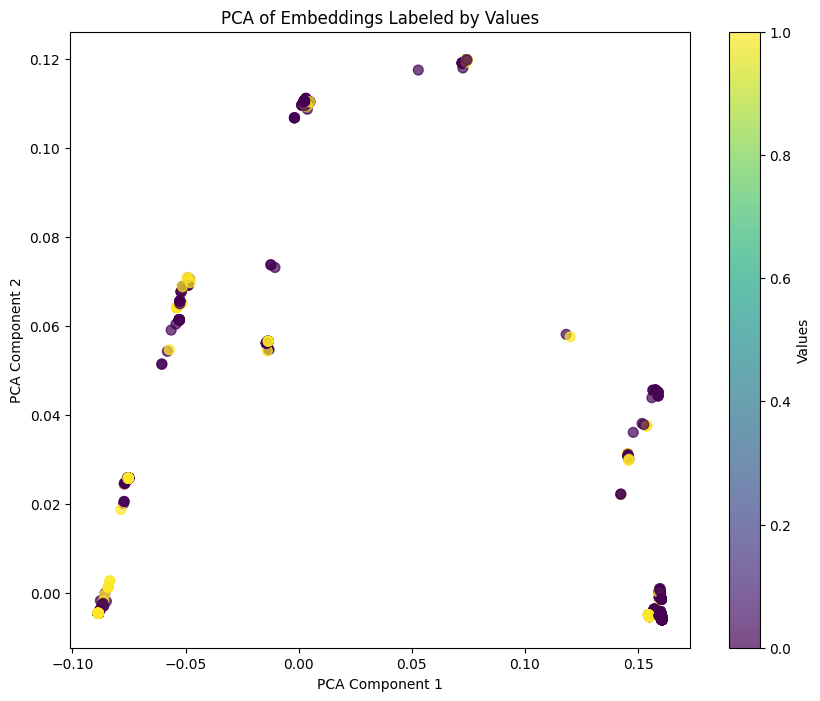

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(concatenated_array)

# Plot the PCA results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)

# Adding a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Values')

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Embeddings Labeled by Values')
plt.show()